# NoSQL

---

## 기존 RDBMS와의 차이점
- RDBMS : 단일 하드웨어에서의 동작을 가정
 * 빅데이터 처리의 한계점
 * 스키마의 고정 : Table, index를 미리 정의, 데이터 속성이 비정형인 분야에서 단점, 수정의 어려움
  
  > Column의 추가, 수정, 삭제는 row lock, index의 수정은 table lock
 
 * Join : join 시 많은 양의 데이터를 복잡한 연산을 통해 가져옴, 비용이 큼, 파티션 내에서만
 * ACID transaction : 오히려 이게 문제가 됨
 
  > Atomicity(원자성): 트랜잭션과 관련된 작업들이 부분적으로 실행되다가 중단되지 않는 것을 보장
  
  > Consistency(일관성): 트랜잭션이 실행을 성공적으로 완료하면 언제나 일관성 있는 데이터베이스 상태로 유지
  
  > Isolation(격리성): 트랜잭션을 수행 시 다른 트랜잭션의 연산 작업이 끼어들지 못하도록 보장
  
  > Durability(지속성): 성공적으로 수행된 트랜잭션은 영원히 반영
 
 * 수직적 확장 구조로 처리 시 비용의 증가

## Master-Slave Replication
- 데이터를 안정적으로 보존하기 위함
- Master만 Write를 하므로 부하가 집중됨
- Slave가 업데이트 지연될 경우 문제 -> 이런 실시간성 Read는 Master에서(부하!)

> 결과를 slave의 개수만큼 복제함.

> 용량 확장이 아닌 시스템의 안정성 부여

> 읽기는 빠르지만 쓰기는 하나의 노드에 대해서만 일어나기 때문에 병목현상 발생

> Master에서 slave로 퍼지는데 시간이 소요되기 때문에 중요한 읽기 작업은 여전히 Master에서 읽어야 하고, 이것은 어플리케이션 개발에 고려가 필요함

> 데이터 규모가 큰 경우에는 N번 복제를 해야 하기 때문에 문제가 발생할 소지가 있음. 이것은 Master-Slave 방식으로 확장성에 대한 제한을 가지게 됨.

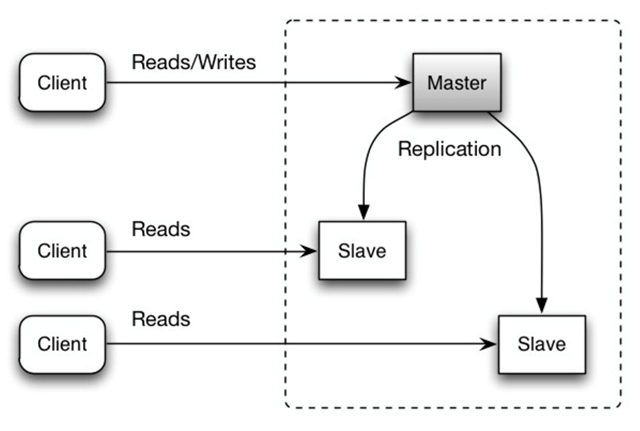

## Sharding(Partitioning)
- 데이터를 각 DB에 분할관리

## 분산시스템에서는?
- Consistency: 각각의 사용자가 항상 동일한 데이터를 조회해야 함 
- Availability: 모든 사용자가 항상 읽고 쓸 수 있음
- Partition tolerance: 물리적 네트워크 분산 환경에서 시스템이 잘 동작
- 세 개를 다 만족하기 어려워 하나를 포기함

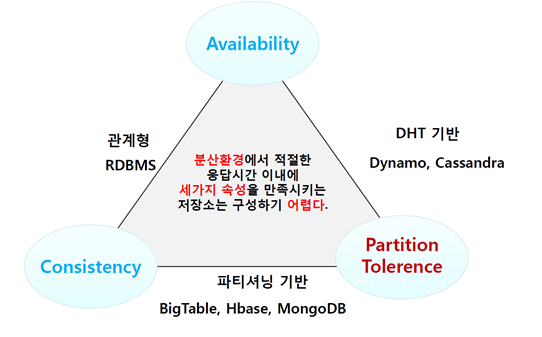

## NoSQL?
- SQL interface를 지원하지 않은 오픈소스 관계형DB를 NoSQL이라 정의
- 시스템 구조의 단순화
- 시스템을 이기종 장비 에도 이식시킬 수 있게 함
- 표준 상용 제품보다 기능을 줄이면서 가격도 저렴하게 함
- 데이터 필드 크기, 컬럼 등의 제약 없앰

> Non-Relational

> No-Schema

> Distributed

> Less Restricted ACID

## NoSQL 구분

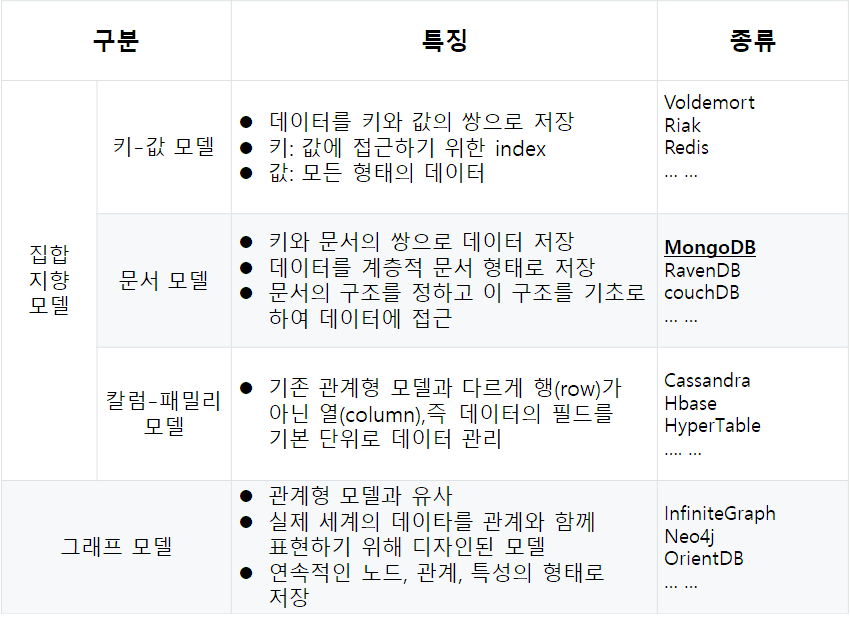

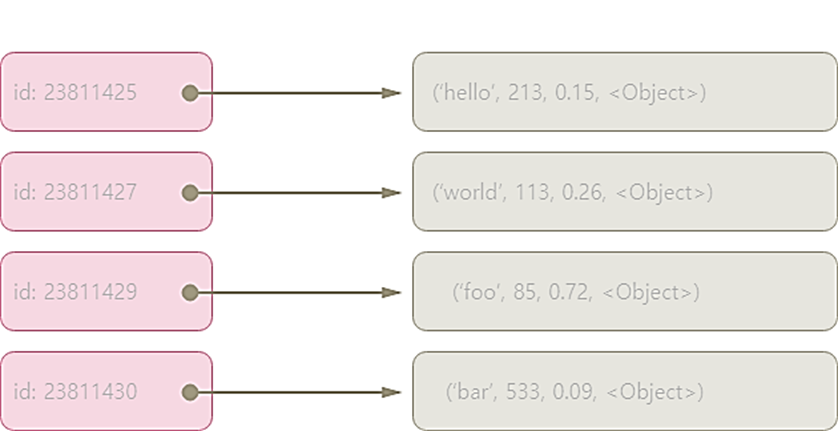

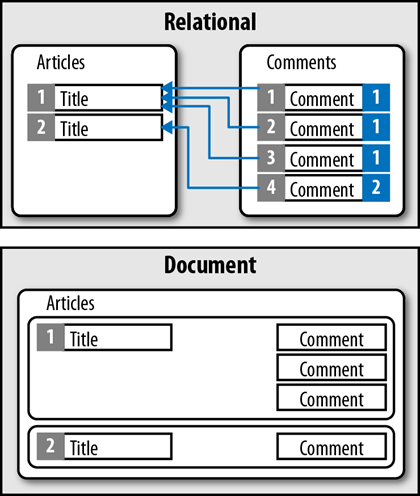

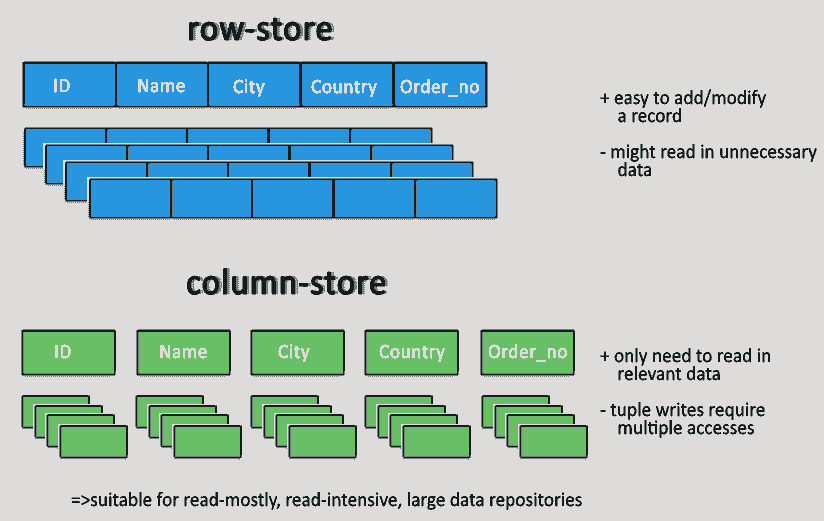

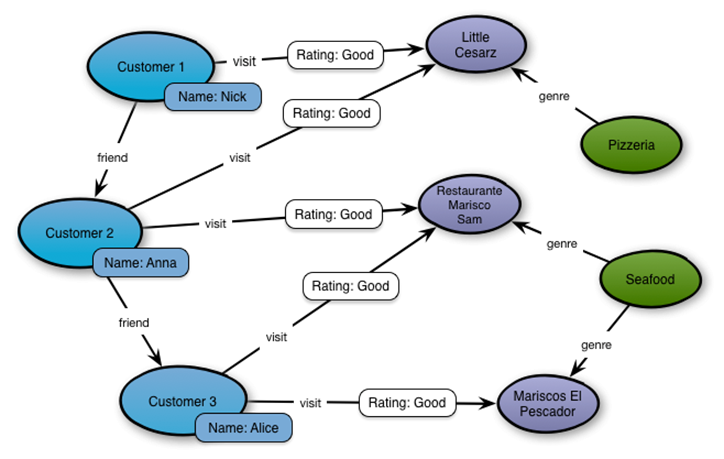

## RDBMS VS NoSQL

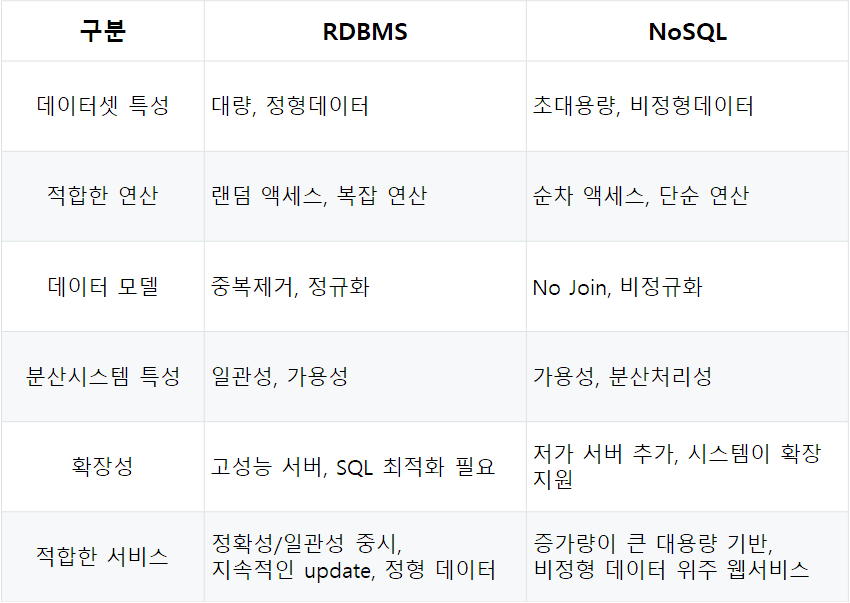

## mongoDB
- cross-platform : 다양한 목적의 app에서 사용 가능
- 문서모델 기반
- 높은 퍼포먼스, 가용성, 확장성
 * Map Reduce, aggregation framework, TTL/capped collections, secondary indexing 등
 * auto sharding 기능(수평 확장), read, write 확장성, data balancing을 자동적으로
- JSON 유사한 document와 schema 구성
 * 유연한 schema 디자인(attribute 속성 정의를 안해서 자유로운 data 수정)

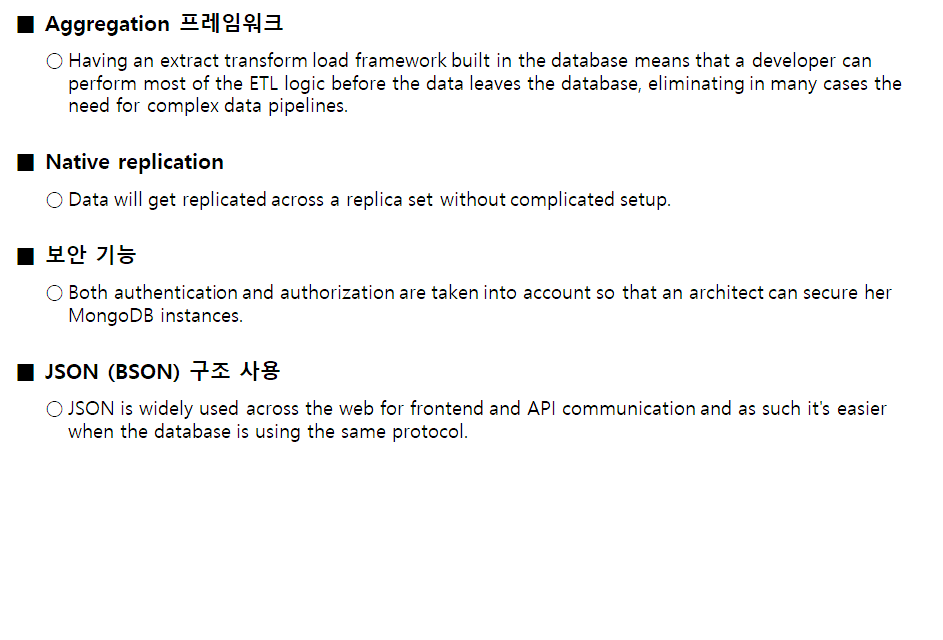

## MongoDB의 단점
- schema-less
 * 이로인해 데이터 수정 및 확장은 용이하나
 * app에서 제대로 관리 못하면 DB 처리가 더 복잡해짐(schema를 DBMS에서 app 레벨로 옮김)
- ACID 미지원
 * 수평적 확장성
 * 금융 등의 분야에서는 치명적
 * rollback이 부족(데이터 손실 위험)

## RDBMS VS MongoDB

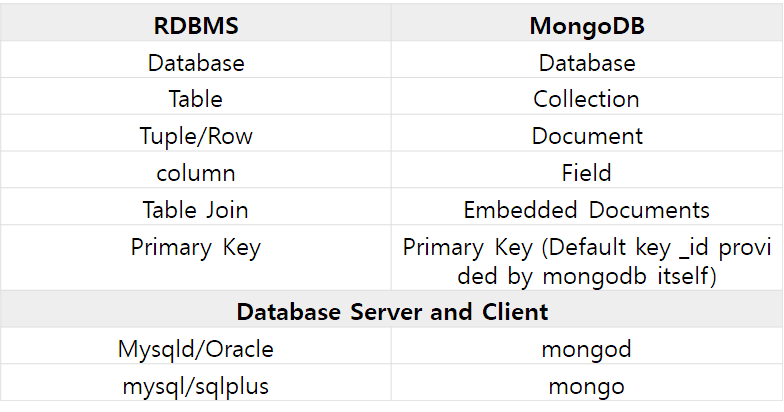

## MongoDB 특징
- RDBMS과 유사하게 field의 이름과 그에 따른 값을 저장
- 데이터의 타입에 대한 별도적 명시 X
- 하나의 field값에 대해서 리스트 형태로 여러 개의 데이터를 관리할 수 있음
- Document 내에 embedded sub-document를 생성하여 관리
- Document들의 집합
 * Collection 내의 document는 서로 다른 schema를 가질 수 있음
 * 같은 field 명을 가진 document이지만 데이터의 type이 달라도 문제가 없음
 * 같은 collection 내의 데이터끼리 field명이 다를 수도 있음
 * 같은 collection 내의 document 구조가 달라도 됨

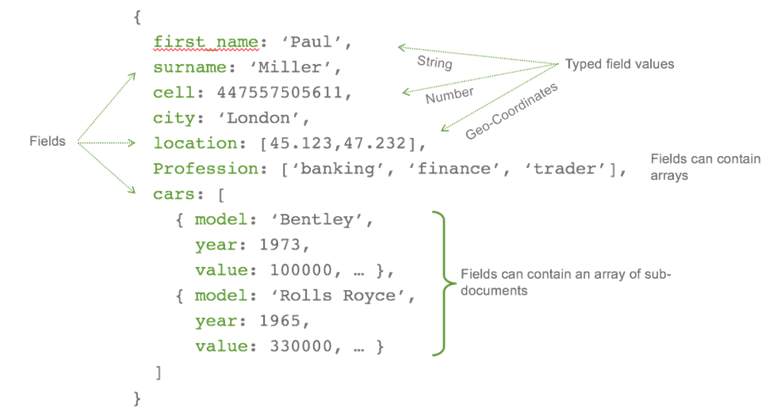

## one to one relationship

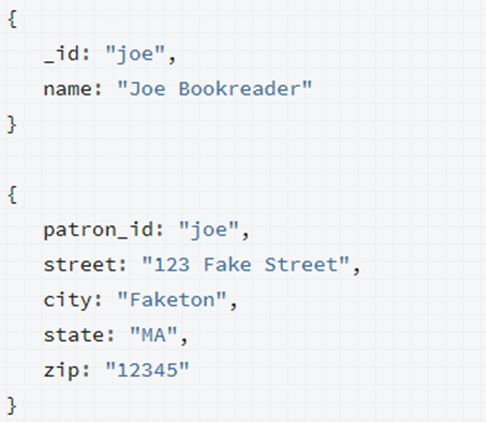

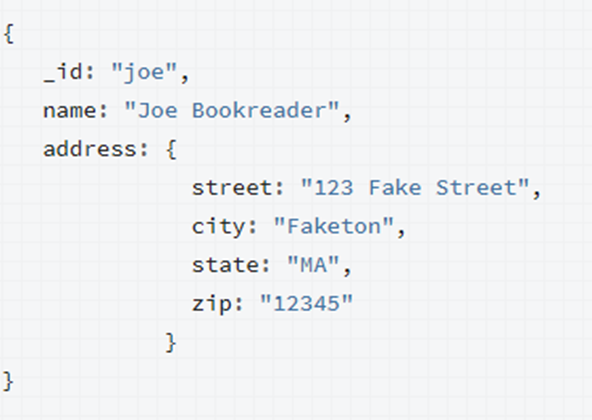

## one to many relationship

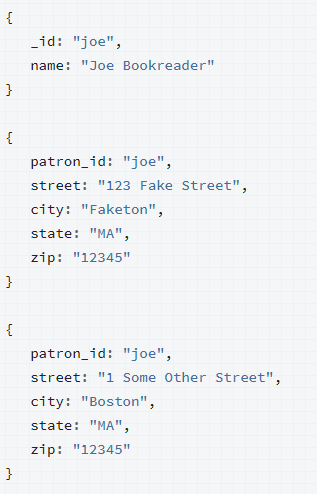

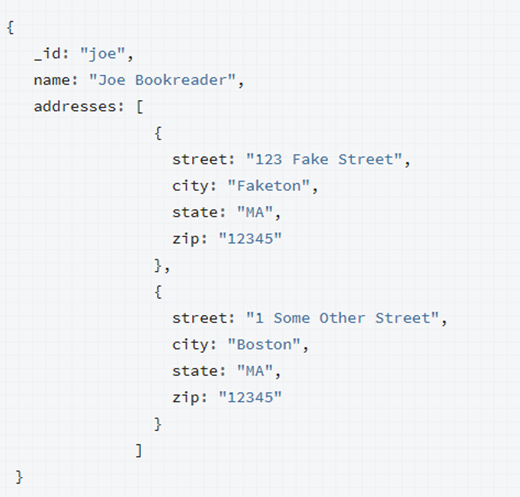

## many to many relationship
- embedded document 시, 데이터 중복이 발생하므로, 이를 방지하기 위해 document reference로 처리

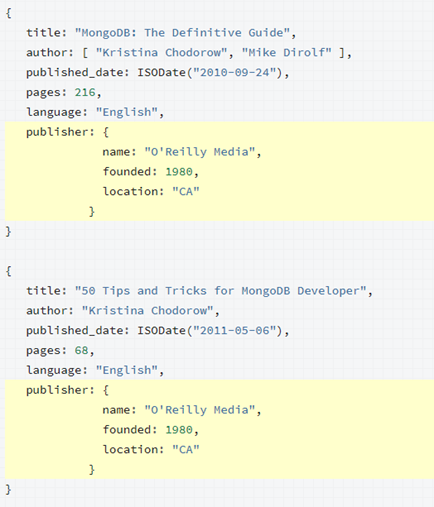

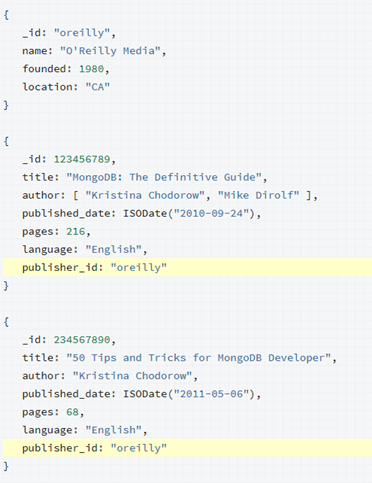

## MongoDB 서버
- mongod
 * --bind_ip {ip address}
 * --dbpath {DB 저장 위치}
 * --port {포트번호}
 * --auth : 인증(계정이 있어야만 로그인 할 수 있도록 지정)
- mongo
  * mongo shell 접속
  * mongo –u 'ID' –p '비밀번호' –authenticationDatabase "접속 DB명"

## Mongo shell 명령어
- show databases(show dbs)
- use {DB}
 * DB없으면 새로 생성하면서 선택
- db.dropDatabase()
 * 현재 선택중인 DB 제거
- show roles
 * 권한 출력
 * DB마다 권한 다름
- show collections
- show users
- db.createUser({user:"이름", pwd:"암호", roles:[{role:"역할", db:"관리 DB"}, ...]});
- db.dropUser("이름")
- db.createCollection('collection명', [인자])
 * 얘를 해줘야 DB가 생성되고 저장이 된다(use "db"로만 안됨!)
 * capped : 크기 고정 collection, 용량 초과 시 오래된 데이터 덮어씀
 * size : collection의 크기를 byte 단위로
 * max : 최대 저장할 doc. 의 개수
- db."collection 명".drop() : 말그대로 드랍
- db."collection 명".find()
 * collection에 뭐들었나 보여줌
 * .pretty()하면 더 예쁘게 보여줌
 * db.item.find({}, {_id:false})
  > _id는 기본이 true라 true로 지정하면 error, 나머지는 기본이 false라 false하면 error
- typeof {객체} : 뭔 타입인지
- {객체} instanceof {타입} : 해당 타입이 맞는지 여부
- db."collection 명".find().sort()
 * 1은 오름차순, -1은 내림차순
 * ex) db.item.find().sort({price : 1})
- db."collection 명".find().count()
- db."collection 명".find().count(수) : 출력 수 제한
- db."collection 명".find().skip(수) : 수 만큼 건너뜀

## Insert
- db."collection 명".save({dictionary 형태 데이터})
 * 얘는 id가 중복되어도 입력이 된다(Update)
- db."collection 명".insert({dictionary 형태 데이터})
 * 얘는 id가 중복되면 입력 안됨(단, 다른게 중복되면 입력 잘됨)
 * 보안 문제상 deprecate된 명령어라 아래의 두 개를 사용
 * db."collection 명".insertOne({dictionary 형태 데이터})
 * db."collection 명".insertMany([{dictionary 형태 데이터}, ...])

## Update
- db."collection 명".update({dictionary 형태 데이터})
 * ex) db.item.update({name: "item1"}, {price: 90000, ratio:4.6})
 * 위에처럼 하면 아예 document가 update값 자체로 바뀌어버림
 * 중복 항목이 여러 개면 최상위 1개만 변경됨
- multi : 업데이트 여러 개

 * ex) db.item.update({price: {$gte:10000}}, {$set : {name: "item8", price: 15000}}, {multi: true})

 
- \$set : 특정 field만 수정
- \$unset : 특정 field만 제거
 
 * db.item.updateMany({name: "item6"}, {$unset:{price: 10202}})
 * 이 때, price가 중요한거지, 뒤에 어떤 값이 와도 상관 X
- \$inc : 값 증감
- \$mul : 값 곱
- \$min : field이 입력값보다 크다면 입력값으로
- \$max : field이 입력값보다 작다면 입력값으로
- \$rename : 명칭 수정
 * 단, 수정한 것은 맨 뒤로 저장됨
- upsert : 없으면 insert

 * ex) db.item.update({price: {$gte:100000}}, {name: "item8", price: 15000}, {upsert: true})
 
- update는 deprecate라서 insert처럼
 * updateOne, updateMany 사용
 * updateReplace는 set이나 inc 없이 교체하는 것

## Delete
- .remove()
 * deprecated
 * drop, deleteOne, deleteMany

## 이 외에도...
- embedded doc. 참조
 * db.testlist.find({'doc.name' : "A"})
 * db.testlist.find({"doc":{"$elemMatch":{"name":'A'}}})
- list의 값 추가 및 삭제

 * db.testlist.updateOne({_id:1}, {$push : {list: 5}})
 
 * db.testlist.updateOne({_id:1}, {$pull : {list: 5}})
 
- shell script
 * javascript로 script 짜서 실행할 수 있음
 * 하는 법은 찾아보기

- indexing
 * .getIndexes() : index들 가져옴, 기본은 _id
 * .getIndexKeys()
 * .createIndex({'Key로 쓸 field':1 또는 -1}) : Key를 토대로 1 오름차순, -1 내림차순으로 새로운 index 생성
 * .totalIndexSize() : byte단위 index 크기 확인 가능
 * .dropIndexes() : index 제거
 * .dropIndex('Key 값') : 해당 Key index만 제거

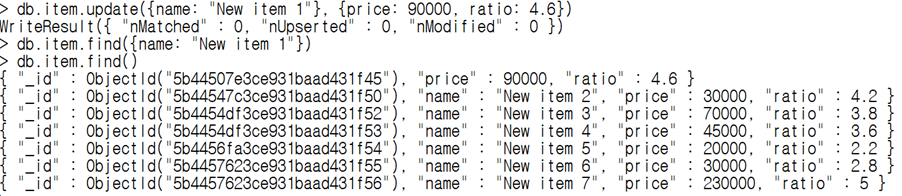

## Data type
- BSON 형식
- Date() : string 시간
- ISODate() : object 시간
- ObjectId()
 * doc. 의 key값
 * 12bytes hexadecimal
 * 지정 안하면 index값을 순차적으로 생성
- NumberInt(수) : 32비트
- NumberLong(수) : 64비트
- NumberDecimal(수) : 128비트

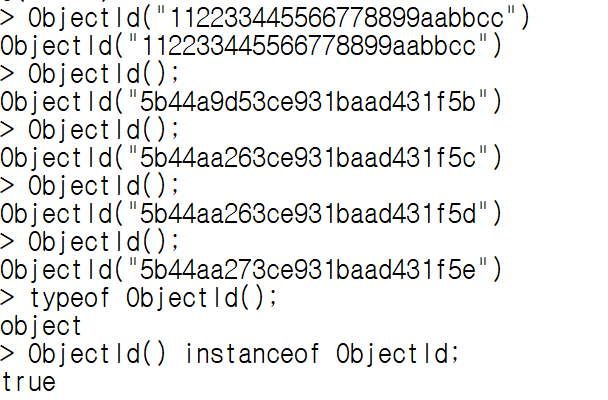

## 비교 및 논리 연산자
- dictionary로 넘기므로 연산자(<, >, ==)대신 다른걸 사용함
- ex) db.item.find({price :{$gte: 20000\}\})

- \$eq, \$gt, \$gte, \$lt, \$lte, \$ne, \$in, \$nin
- \$or, \$and, \$not, \$nor
 * and는 그냥 list의 dictionary 여러 개 주는 식으로 해도 됨
- \$exists : 존재 여부
- \$type
 * ex) db.testdecimal.find( \{ value: \{ $type:'decimal'\}\})
 * NumberDecimal(9.9) != 9.9 // double은 같지 않음, double(9.899999997)과 decimal의 형태가 다름
 * NumberDecimal(10) = NumberInt(10) = 10 // 얘는 동등하게 저장되고 처리되므로
 
- \$regex
 * db.item.find(\{name:\{$regex:/item[1-3]/}});

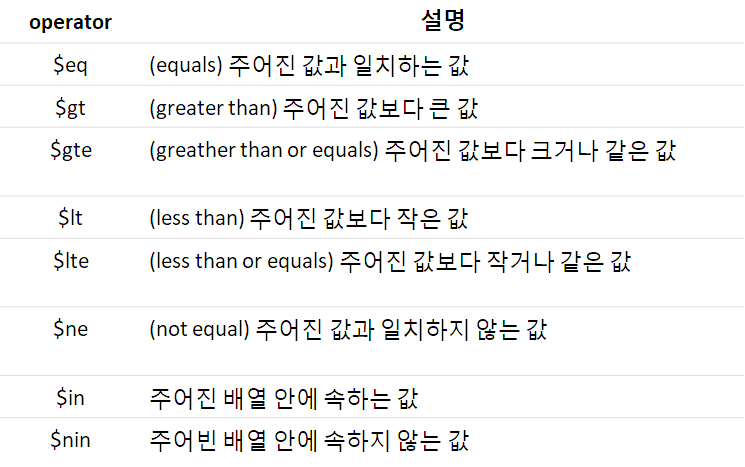

# 180718

---

## Practice : 관계도는 어떻게 되는가?
- 1:N 관계를 예로 보면, [사용자]-<거주>-[주소] 와 같이 나타낼 수 있음
- 이럴 때는 Embedded doc. 로 표시

## validator?
- 어떤 자료형이 들어가야될지 말지 정해주는 것

## pymongo
- 

In [2]:
from pymongo import MongoClient

In [3]:
client = MongoClient('127.0.0.1')

In [4]:
client.HOST

'localhost'

In [5]:
client.server_info()

{'version': '4.0.0',
 'gitVersion': '3b07af3d4f471ae89e8186d33bbb1d5259597d51',
 'targetMinOS': 'Windows 7/Windows Server 2008 R2',
 'modules': [],
 'allocator': 'tcmalloc',
 'javascriptEngine': 'mozjs',
 'sysInfo': 'deprecated',
 'versionArray': [4, 0, 0, 0],
 'openssl': {'running': 'Windows SChannel'},
 'buildEnvironment': {'distmod': '2008plus-ssl',
  'distarch': 'x86_64',
  'cc': 'cl: Microsoft (R) C/C++ Optimizing Compiler Version 19.00.24223 for x64',
  'ccflags': '/nologo /EHsc /W3 /wd4355 /wd4800 /wd4267 /wd4244 /wd4290 /wd4068 /wd4351 /wd4373 /we4013 /we4099 /we4930 /WX /errorReport:none /MD /O2 /Oy- /bigobj /utf-8 /Zc:rvalueCast /Zc:strictStrings /volatile:iso /Gw /Gy /Zc:inline',
  'cxx': 'cl: Microsoft (R) C/C++ Optimizing Compiler Version 19.00.24223 for x64',
  'cxxflags': '/TP',
  'linkflags': '/nologo /DEBUG /INCREMENTAL:NO /LARGEADDRESSAWARE /OPT:REF',
  'target_arch': 'x86_64',
  'target_os': 'windows'},
 'bits': 64,
 'debug': False,
 'maxBsonObjectSize': 16777216,
 '

In [6]:
client.close()

In [7]:
list_db = client.list_databases()

TypeError: 'Database' object is not callable. If you meant to call the 'list_databases' method on a 'MongoClient' object it is failing because no such method exists.

In [8]:
list_db

NameError: name 'list_db' is not defined

In [9]:
list(list_db) # 한 번 더 실행하면 이게 안나온다(cursor 때문)

NameError: name 'list_db' is not defined

In [10]:
for i in list_db:
    print(i)
    print(type(i))

NameError: name 'list_db' is not defined

In [11]:
admin = client.get_database("admin")

In [12]:
admin.profiling_info()

[]

In [13]:
test = client.get_database("test") # 생성도 이렇게

In [14]:
test

Database(MongoClient(host=['127.0.0.1:27017'], document_class=dict, tz_aware=False, connect=True), 'test')

In [15]:
test2 = client.test

In [16]:
test2

Database(MongoClient(host=['127.0.0.1:27017'], document_class=dict, tz_aware=False, connect=True), 'test')

In [17]:
test3 = client["test"]

In [18]:
test3

Database(MongoClient(host=['127.0.0.1:27017'], document_class=dict, tz_aware=False, connect=True), 'test')

In [19]:
item1 = test.item

In [20]:
item1

Collection(Database(MongoClient(host=['127.0.0.1:27017'], document_class=dict, tz_aware=False, connect=True), 'test'), 'item')

In [21]:
item2 = test["item"]

In [22]:
item2

Collection(Database(MongoClient(host=['127.0.0.1:27017'], document_class=dict, tz_aware=False, connect=True), 'test'), 'item')

In [29]:
item3 = test.get_collection("item")

In [30]:
item3

Collection(Database(MongoClient(host=['127.0.0.1:27017'], document_class=dict, tz_aware=False, connect=True), 'test'), 'item')

In [31]:
newItem1 = {'name':'item1',
           'price':float(10000),
           'ratio':4.1}

In [32]:
item1.insert_one(newItem1)

In [33]:
import requests
import json
from urllib.parse import urlencode, quote_plus, unquote
def getData(num_row=10, pg_size=10, pg_num=1, pg_start=1, sido_name='서울', sch_cond='DAILY', ver=1.3, rt_type="json", num_retries=2):
    url = 'http://openapi.airkorea.or.kr/openapi/services/rest/ArpltnInforInqireSvc/getCtprvnMesureSidoLIst' 
    params = {'ServiceKey' : unquote('9yufdGwfG5nTrm48106s%2B%2FQK%2Bz6byu8kQyqGYX7ywOTcSZz5hKnJG6OSAFPymm3Ei6TrKcsL3Osas1zm4v6HmA%3D%3D'), 
                               'numOfRows' : num_row, 
                               'pageSize' : pg_size,
                               'pageNo' : pg_num,
                               'startPage' : pg_start,
                               'sidoName' : sido_name, 
                               'searchCondition' : sch_cond,
                               'ver' : ver,
                               '_returnType' : rt_type}

    res = requests.get(url, params = params)
    if 500 <= res.status_code<600 and num_retries>0:
        print(html.status_code, res, reason)
        return getUrl(url=url, params = params, mum_retires = (num_retries-1))
    resStr = res.content
    resStr = resStr.decode('utf-8')
    resObj = json.loads(resStr)
    print(json.dumps(resObj, indent="  ",  ensure_ascii=False))
    return resObj




In [37]:
air_list = getData()["list"]

{
  "list": [
    {
      "_returnType": "json",
      "cityName": "강남구",
      "cityNameEng": "Gangnam-gu",
      "coValue": "0.4",
      "dataGubun": "",
      "dataTime": "2018-07-18 11:00",
      "districtCode": "02",
      "districtNumSeq": "001",
      "itemCode": "",
      "khaiValue": "",
      "no2Value": "0.034",
      "numOfRows": "10",
      "o3Value": "0.012",
      "pageNo": "1",
      "pm10Value": "31",
      "pm25Value": "24",
      "resultCode": "",
      "resultMsg": "",
      "searchCondition": "",
      "serviceKey": "",
      "sidoName": "서울",
      "so2Value": "0.007",
      "totalCount": ""
    },
    {
      "_returnType": "json",
      "cityName": "강동구",
      "cityNameEng": "Gangdong-gu",
      "coValue": "0.4",
      "dataGubun": "",
      "dataTime": "2018-07-18 11:00",
      "districtCode": "02",
      "districtNumSeq": "002",
      "itemCode": "",
      "khaiValue": "",
      "no2Value": "0.022",
      "numOfRows": "10",
      "o3Value": "0.014",
      "pa

In [38]:
air_db = client.get_database("air_db")

In [40]:
air = air_db.item

In [41]:
air.insert_many(air_list)

In [43]:
client = MongoClient('localhost')

In [44]:
sns = client.get_database("sns")

In [46]:
def create_user(user_id, user_pwd, name, email):
    new_user = {'_id':user_id,
               'pwd':user_pwd,
               'name':name,
               'email':email,
               'address':[],
               'profile':"",
               'friends':[]}
    return  client.sns.user.insert_one(new_user)

In [47]:
create_user('asda', 'j2jd9', 'Tom', 'tom@gmail.com')

In [48]:
def add_address(user_id, address, info, tel):
    new_address = {'address':address,
                  'info':info,
                  'tel':tel}
    
    client.sns.user.update_one(
    {'_id':user_id},
    {'$addToSet':{'address':new_address}})

In [64]:
add_address('asda', 'Seoul Yangchun-gu', 'Seoul', '010-0000-1111')

In [59]:
def delete_address(user_id, address):
    client.sns.user.update_one(
    
        {'_id':user_id},
        {'$pull':{'address':{'address':address}}}
        
    )

In [ ]:
from pymongo import V

In [68]:
validator = {
    '$JsonSchema':{
        'bsonType':'object',
        'required':['name', 'member'],
        'properties':{
                'name':{
                    'bsonType':'string',
                    'description':'Name must be string'
                },
            'member':{
                'bsonType':'array',
                'description':'Member must be array'
            }
        }
    }
}

In [ ]:
client.